# Matemática para Ciencia de los Datos
# Trabajo Práctico 3

Profesor: Luis Alexánder Calvo Valverde 

Instituto Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Fecha de entrega: Lunes 15 de Mayo del 2023, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ). 

Estudiante(s):
1. **Ricardo Chacon Brenes**
1. **Gabriel Valentine Fonseca**


---

**Pregunta 1**



Se puede demostrar que para los vectores generadores de un subespacio $E=\textrm{espacioGenerado}\left\{ \vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right\}$ , con $V=\left[\vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right]$,con $\vec{v}_{m}\in\mathbb{R}^{n}$ si son ortonormales, la ecuación de la proyección de un vector $\vec{u}\in\mathbb{R}^{n}$ originalmente dada por:

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$$

se puede reescribir como: 

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,V^{T}\vec{u}$$

con $V\in\mathbb{R}^{n\times m}$.









**1.1 (25 puntos)**

Utilizando numpy, proponga una matriz ortonormal de dimensiones 3x3, para ello utilice una fuente como "Proceso de ortonormalización de  Gram - Schmidt" (https://blog.nekomath.com/algebra-lineal-i-proceso-de-gram-schmidt/) para producir una matriz ortonormal a partir de una matriz que no es ni ortonormal ni ortogonal. 

Finalmente muestre en numpy que su matriz resultante es ortonormal ($V$).



In [7]:
import numpy as np


# matriz no ortogonal de dimensiones 3x3
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

#  proceso de Gram-Schmidt
def gram_schmidt(A):
    Q = np.zeros_like(A, dtype=np.float64)
    for i in range(A.shape[1]):
        v = A[:, i]
        for j in range(i):
            q = Q[:, j]
            v -= np.dot(v, q) * q
        Q[:, i] = v
    return Q

#  matriz ortogonal
Q = gram_schmidt(A.astype(np.float64))  # Convertir la matriz A a tipo float64

# Normalizar los vectores para obtener una matriz ortonormal
V = Q / np.linalg.norm(Q, axis=0)

#  matriz resultante
print(V)



[[ 0.12309149 -0.12178033  0.12178033]
 [ 0.49236596 -0.49192844  0.49192844]
 [ 0.86164044 -0.86207654  0.86207654]]


**1.2 (15 puntos)**

Proponga un vector $\vec{u}$ y programe en numpy las operaciones algebraicas siguientes (tome $V$ del paso anterior).

$V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$

y,

$V\,V^{T}\vec{u}$



In [8]:
import numpy as np

#  vector u
u = np.array([1, 2, 3])

#  matriz V obtenida en el paso anterior

#  V*(V^T * V)^(-1) * V^T * u
projection_1 = V @ np.linalg.inv(V.T @ V) @ V.T @ u

#  V * V^T * u
projection_2 = V @ V.T @ u

#  resultados
print("Resultado 1:", projection_1)
print("Resultado 2:", projection_2)


Resultado 1: [1.00030498 1.12853618 2.64121656]
Resultado 2: [1.35373898 5.45045037 9.54716176]


**1.3 (10 puntos)**

Programe en python para calcular el error de proyección obtenido para los casos del punto **1.2**.

In [9]:
import numpy as np

# función para calcular el error de proyección
def calcular_error_proyeccion(proyeccion, vector_original):
    error = np.linalg.norm(proyeccion - vector_original)
    return error

#  vector u
u = np.array([1, 2, 3])

# Definir la matriz V obtenida en el paso anterior

# Calcular 
proyeccion_1 = V @ np.linalg.inv(V.T @ V) @ V.T @ u
error_1 = calcular_error_proyeccion(proyeccion_1, u)

# Calcular 
proyeccion_2 = V @ V.T @ u
error_2 = calcular_error_proyeccion(proyeccion_2, u)

# Imprimir los errores de proyección
print("Error de proyección 1:", error_1)
print("Error de proyección 2:", error_2)


Error de proyección 1: 0.942430286894169
Error de proyección 2: 7.409187957852575


---

**Pregunta 2 (10 puntos)**


Programe en python la función calculeDet2, que recibe como parámetro una matriz cuadrada de dimensiones 2x2, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función tipo det para calcularla. Pruébela con dos matrices que Usted proponga.

def calculeDet2( M ):





In [10]:
def calculeDet2(M):
    det = M[0, 0] * M[1, 1] - M[0, 1] * M[1, 0]
    return det

# Prueba de la función con dos matrices propuestas
# Matriz 1
matriz1 = np.array([[2, 3], [4, 5]])
det1 = calculeDet2(matriz1)
print("Determinante de la matriz 1:", det1)

# Matriz 2
matriz2 = np.array([[1, -1], [3, 2]])
det2 = calculeDet2(matriz2)
print("Determinante de la matriz 2:", det2)


Determinante de la matriz 1: -2
Determinante de la matriz 2: 5


---

**Pregunta 3 (10 puntos)**


Programe en python la función calculeDet3, que recibe como parámetro una matriz cuadrada de dimensiones 3x3, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función de numpy tipo det para calcularla (sí puede usar función que programó en la **Pregunta 2**). Pruébela con dos matrices que Usted proponga.

def calculeDet3( M ):






In [3]:
def calculeDet3(M):
    a = M[0, 0]
    b = M[0, 1]
    c = M[0, 2]
    d = M[1, 0]
    e = M[1, 1]
    f = M[1, 2]
    g = M[2, 0]
    h = M[2, 1]
    i = M[2, 2]

    det = a * (e * i - f * h) - b * (d * i - f * g) + c * (d * h - e * g)
    return det

# Prueba de la función con dos matrices propuestas
# Matriz 1
matriz1 = np.array([[2, 3, 1], [4, 5, 2], [1, 2, 3]])
det1 = calculeDet3(matriz1)
print("Determinante de la matriz 1:", det1)

# Matriz 2
matriz2 = np.array([[1, -1, 2], [3, 2, 0], [1, 4, -2]])
det2 = calculeDet3(matriz2)
print("Determinante de la matriz 2:", det2)


Determinante de la matriz 1: -5
Determinante de la matriz 2: 10


---

**Pregunta 4 (15 puntos)**

Se tiene que:

$$\textrm{det}\left(A\,B\right)=\textrm{det}\left(A\right)\,\textrm{det}\left(B\right)$$

Proponga dos matrices de 4x4 ( $A$ e $B$) y programando en numpy muestre esta igualdad (puede usar de numpy las funciones det y la de multiplicar matrices).






In [2]:
import numpy as np

# Definir las matrices A y B
A = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])

B = np.array([[17, 18, 19, 20],
              [21, 22, 23, 24],
              [25, 26, 27, 28],
              [29, 30, 31, 32]])

# Calcular el determinante de A*B
det_AB = np.linalg.det(A @ B)

# Calcular el determinante de A y B
det_A = np.linalg.det(A)
det_B = np.linalg.det(B)

# Calcular el producto de los determinantes de A y B
det_product = det_A * det_B

# Mostrar los resultados
print("Determinante de A*B:", det_AB)
print("Producto de los determinantes de A y B:", det_product)


Determinante de A*B: 0.0
Producto de los determinantes de A y B: 0.0


---

**Pregunta 5 (15 puntos)**


Utilizando el archivo "Dataset_usar.csv", haga:
- Cargue el archivo.
- Muestre cuántas filas por cuántas columnas tiene el conjunto de datos.
- Utilizando el modelo $Ax=b$
    - Conforme la matriz $A$ con todas las columnas menos la última de la derecha.
    - Conforme el vector $b$ con la última columna de la derecha.
    - Calcule el vector de pesos ($x$), utilizando el concepto de mínimos cuadrados $\left(A^{T}A\right)^{-1}A^{T}\vec{b}$
    - Calcule un b_estimado con $A$ e $x$
    - Calcule la norma 2 de la diferencia entre b y b_estimado.
    - Grafique b y b_estimado.



In [34]:
import pandas as pd
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



file_path =r'C:\Users\chaconri\Desktop\Data Science TEC\Dataset.csv'
data = np.genfromtxt(r'C:\Users\chaconri\Desktop\Data Science TEC\Dataset.csv', delimiter=',', skip_header=1, dtype=str)


# Imprime as primeiras 5 linhas do DataFrame
print(data_frame.head())


  bias;Length;Diameter;Height;Whole;Shucked;Sex_Female;Sex_Masculine;Shellweight
0  1;0.186567164;0.155963303;0.195652174;0.011687...                            
1  1;0.813432836;0.76146789;0.826086957;0.4333274...                            
2  1;0.410447761;0.376146789;0.369565217;0.074021...                            
3  1;0.537313433;0.504587156;0.5;0.143084824;0.33...                            
4  1;0.507462687;0.495412844;0.565217391;0.146980...                            


In [36]:
#  pandas a numpy
data = pd.DataFrame(data_frame).to_numpy()

# ver dimensiones
total_columnas = data.shape[1]
total_filas = data.shape[0]
print("Total filas ", total_filas)
print("Total columnas ", total_columnas)

Total filas  998
Total columnas  1


In [37]:
# Construir matriz A y vector b
A = data[:, 1:-1].astype(float)
b = np.array([float(value.split(';')[0]) for value in data[:, -1]])

In [41]:
#  vector de pesos x
x = np.linalg.inv(A.T @ A) @ A.T @ b



In [39]:
#  b_estimado
b_estimado = A @ x


In [42]:
# norma 2 de la diferencia entre b y b_estimado
norma_diferencia = np.linalg.norm(b - b_estimado, ord=2)
print("Norma 2 de la diferencia:", norma_diferencia)



Norma 2 de la diferencia: 31.591137997862628


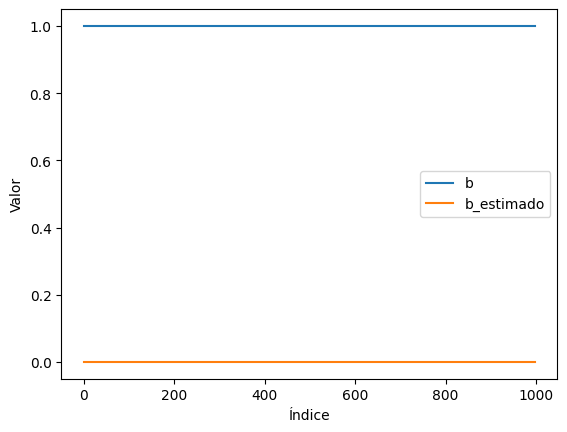

In [43]:
# Graficar b y b_estimado
plt.plot(b, label='b')
plt.plot(b_estimado, label='b_estimado')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()